In [1]:
import warnings

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

## Obtén los datos

In [5]:
data = pd.read_csv('HR-Employee-Attrition_model_data.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,AgeWhenJoined,YearsUntilPromotion,EmployeeEngagement,YearOfJoining,Rango_Edad,Clasificacion,Semaforo,Overtime_Marital,Overtime_squared,JobRole_BusinessTravel
0,44,No,Travel_Rarely,1467,Research & Development,20,3,Life Sciences,1,1475,...,39,1,2.8,2019,36-45,Desempeño Bajo,Naranja,No_Single,0,Research Scientist_Travel_Rarely
1,34,No,Travel_Rarely,735,Sales,3,1,Medical,1,1915,...,30,0,3.0,2020,26-35,Desempeño Medio,Verde,Yes_Married,1,Sales Executive_Travel_Rarely
2,35,No,Travel_Rarely,776,Sales,1,4,Marketing,1,100,...,20,2,2.2,2009,36-45,Desempeño Bajo,Naranja,No_Single,0,Sales Executive_Travel_Rarely
3,50,Yes,Travel_Frequently,562,Sales,8,2,Technical Degree,1,723,...,46,1,2.4,2020,46-55,Desempeño Medio,Rojo,Yes_Married,1,Sales Executive_Travel_Frequently
4,26,No,Travel_Rarely,1349,Research & Development,23,3,Life Sciences,1,560,...,23,0,2.2,2021,26-35,Unicornios,Verde,No_Divorced,0,Research Scientist_Travel_Rarely


# 1 Explorar el Problema

#### Análisis Exploratorio de los Datos

1. Entender el dataset: Significado de las columnas, comprender sus
caracter ́ısticas.

In [7]:
print(data.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


2. Analizar los tipos de datos: ¿Hay variables categ ́oricas? ¿Hay num ́ericas?

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Exploración:
- Mirando la información de nuestro DataSet, vemos que contamos con 35 columnas, de las cuales 26 son numéricas y 9 categóricas.
- Vemos que no tenemos valores nulos, ni duplicados.


In [9]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

4. Determinar el porcentaje de nulos

In [11]:
print((data.isnull().sum()/ data.size)*100)

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

# 2. Análisis Univariado

Vamos elegir variables que puedan ser potenciales.

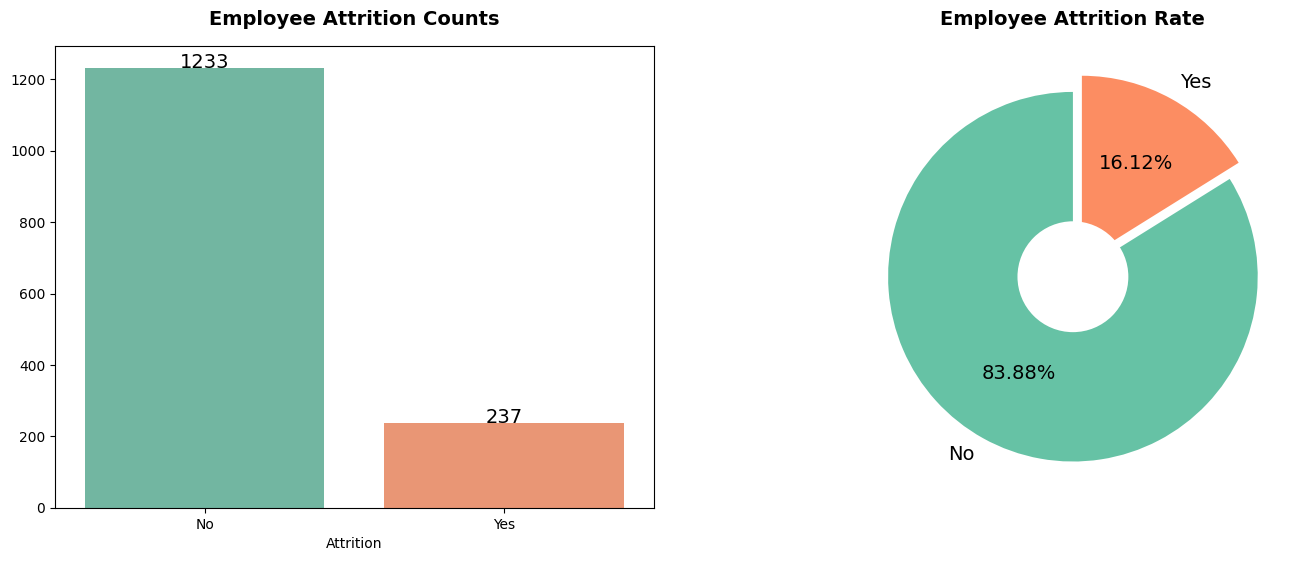

In [97]:
#Visualization to show Employee Attrition in Counts.
data = data.drop(columns=['Over18'])
cat_cols = data.select_dtypes(['object']).columns
for col in cat_cols:
    plt.pie(data[col].value_counts(), labels=data[col].value_counts().values)
    plt.title(col+" Distribution")
    plt.legend(data[col].value_counts().index)
    plt.show()

#! Analizamos:
    #* La variable objetivo es binaria  
    #* Hay un desbalanceo de clases. La clase "No" es mayoritaria.
    #* EL hacer horas extras, es una variante que influye en la tasa de diserción.

Text(0.5, 1.0, 'Age')

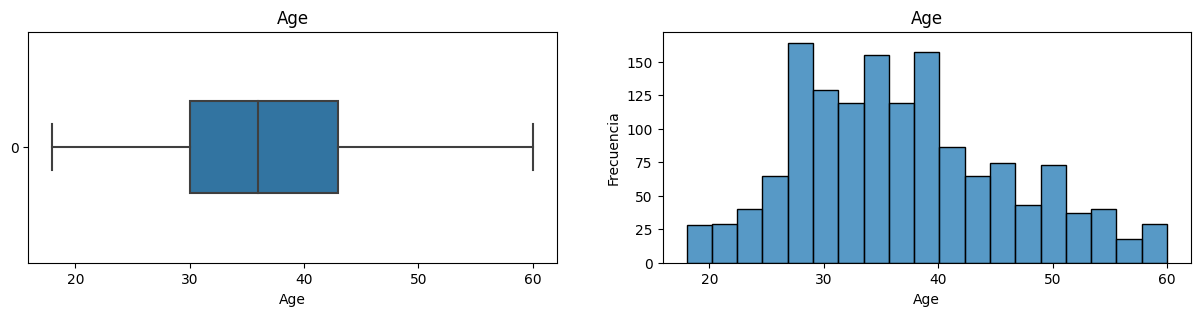

In [99]:
var = "Age"
var_title = "Age"
fig, ax = plt.subplots (1, 2, figsize=(15,3))
sns.boxplot(data=data[var], ax=ax[0], orient="h", width=0.4)
ax[0].set_xlabel(var_title)
ax[0].set_title(var)

sns.histplot(data=data[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel("Frecuencia")
ax[1].set_title(var)

#! Analizamos:
#* La variable "Age" tiene una distribución normal
#* No tiene outliers


Text(0.5, 1.0, 'MaritalStatus')

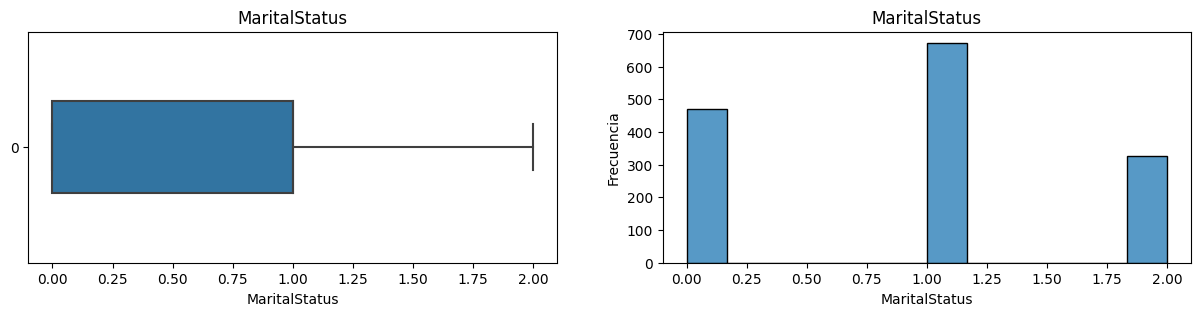

In [39]:
var = "MaritalStatus"
var_title = "MaritalStatus"
fig, ax = plt.subplots (1, 2, figsize=(15,3))
sns.boxplot(data=data[var], ax=ax[0], orient="h", width=0.4)
ax[0].set_xlabel(var_title)
ax[0].set_title(var)

sns.histplot(data=data[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel("Frecuencia")
ax[1].set_title(var)

#! Analizamos:
#* La variable "MaritalStatus" tiene una distribución normal.
#* No tiene outliers.
#* La clase 1 es mayoritaria.


Text(0.5, 1.0, 'EducationField')

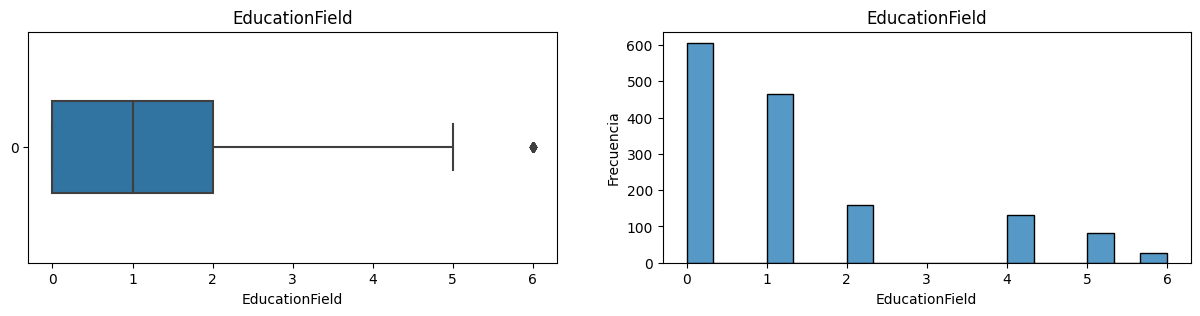

In [40]:
var = "EducationField"
var_title = "EducationField"
fig, ax = plt.subplots (1, 2, figsize=(15,3))
sns.boxplot(data=data[var], ax=ax[0], orient="h", width=0.4)
ax[0].set_xlabel(var_title)
ax[0].set_title(var)

sns.histplot(data=data[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel("Frecuencia")
ax[1].set_title(var)

#! Analizamos:
#* No tiene outliers.
#* La clase 0 es mayoritaria.


Text(0.5, 1.0, 'Department')

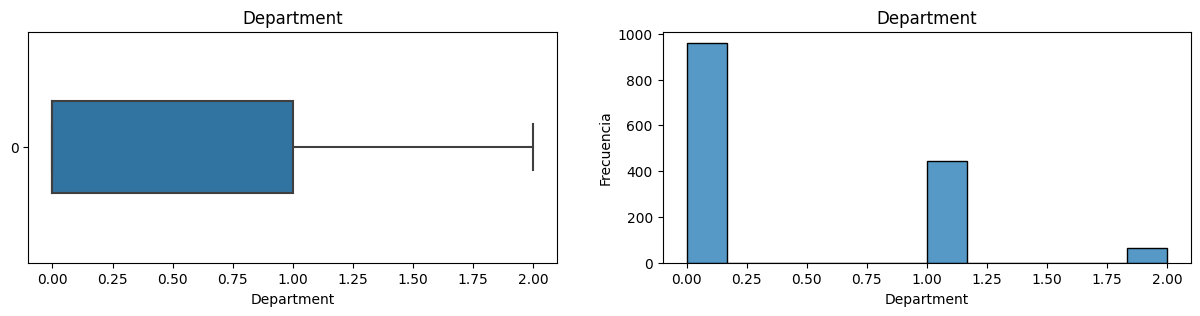

In [41]:
var = "Department"
var_title = "Department"
fig, ax = plt.subplots (1, 2, figsize=(15,3))
sns.boxplot(data=data[var], ax=ax[0], orient="h", width=0.4)
ax[0].set_xlabel(var_title)
ax[0].set_title(var)

sns.histplot(data=data[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel("Frecuencia")
ax[1].set_title(var)

#! Analizamos:
#* No tiene outliers.
#* La clase 0 es mayoritaria.

Text(0.5, 1.0, 'JobRole')

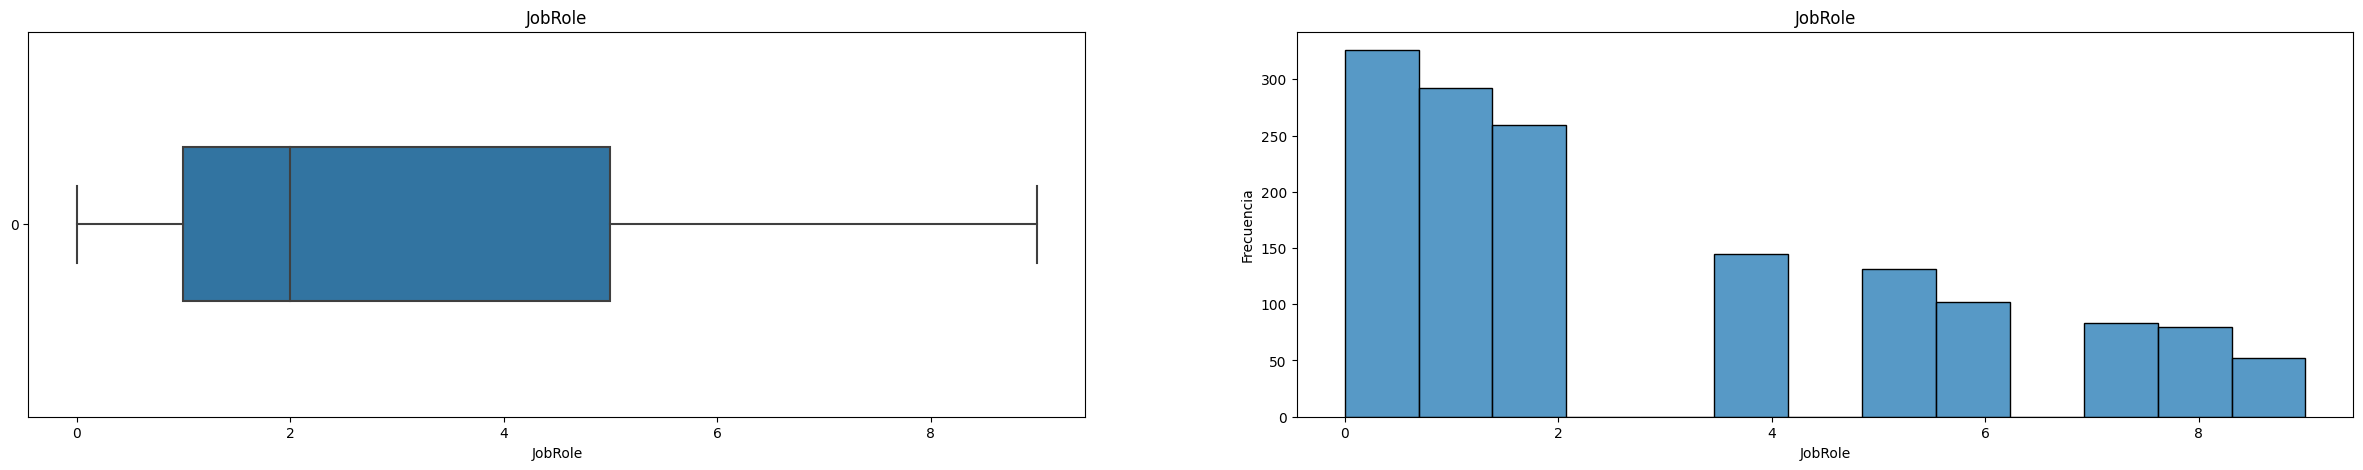

In [48]:
var = "JobRole"
var_title = "JobRole"
fig, ax = plt.subplots (1, 2, figsize=(30,5))
sns.boxplot(data=data[var], ax=ax[0], orient="h", width=0.4)
ax[0].set_xlabel(var_title)
ax[0].set_title(var)

sns.histplot(data=data[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel("Frecuencia")
ax[1].set_title(var)

#! Analizamos:
#* No tiene outliers.
#* Entre 0 y 2 es mayoritaria.
#* Entre las clases hay un desbalanceo de clases.



Text(0.5, 1.0, 'BusinessTravel')

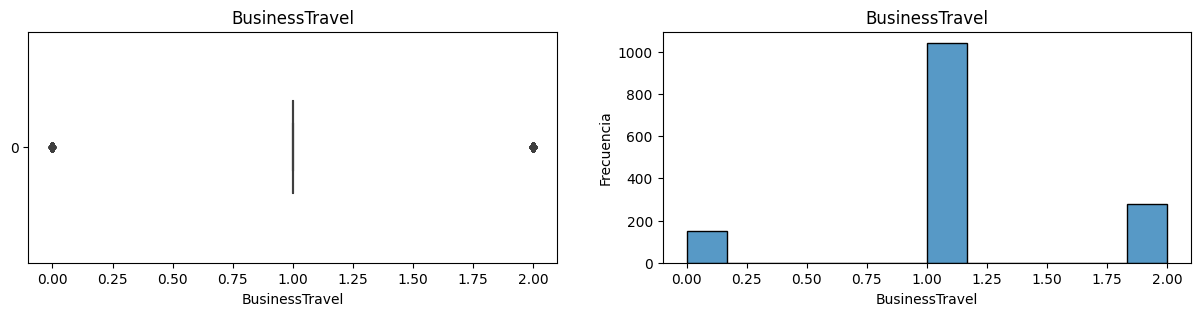

In [43]:
var = "BusinessTravel"
var_title = "BusinessTravel"
fig, ax = plt.subplots (1, 2, figsize=(15,3))
sns.boxplot(data=data[var], ax=ax[0], orient="h", width=0.4)
ax[0].set_xlabel(var_title)
ax[0].set_title(var)

sns.histplot(data=data[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel("Frecuencia")
ax[1].set_title(var)

#! Analizamos:
#* No tiene outliers.
#* La clase 1 es mayoritaria.


Text(0.5, 1.0, 'OverTime')

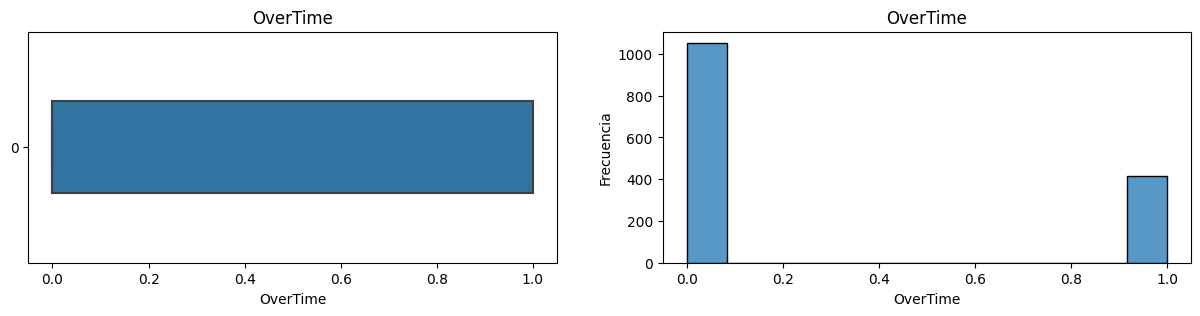

In [29]:
var = "OverTime"
var_title = "OverTime"
fig, ax = plt.subplots (1, 2, figsize=(15,3))
sns.boxplot(data=data[var], ax=ax[0], orient="h", width=0.4)
ax[0].set_xlabel(var_title)
ax[0].set_title(var)

sns.histplot(data=data[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel("Frecuencia")
ax[1].set_title(var)

#! Analizamos:
#* No tiene outliers.
#* La clase 0 es mayoritaria.


Text(0.5, 1.0, 'DistanceFromHome')

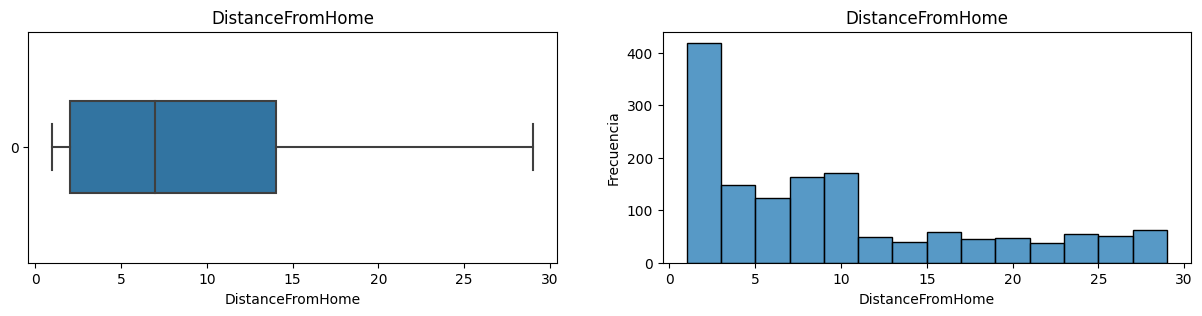

In [44]:
var = "DistanceFromHome"
var_title = "DistanceFromHome"
fig, ax = plt.subplots (1, 2, figsize=(15,3))
sns.boxplot(data=data[var], ax=ax[0], orient="h", width=0.4)
ax[0].set_xlabel(var_title)
ax[0].set_title(var)

sns.histplot(data=data[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel("Frecuencia")
ax[1].set_title(var)

#! Analizamos:
#* No tiene outliers.
#* La clase 0 es mayoritaria.
    #* Entre 0 y 10 km hay una mayor cantidad de empleados.

Text(0.5, 1.0, 'MonthlyIncome')

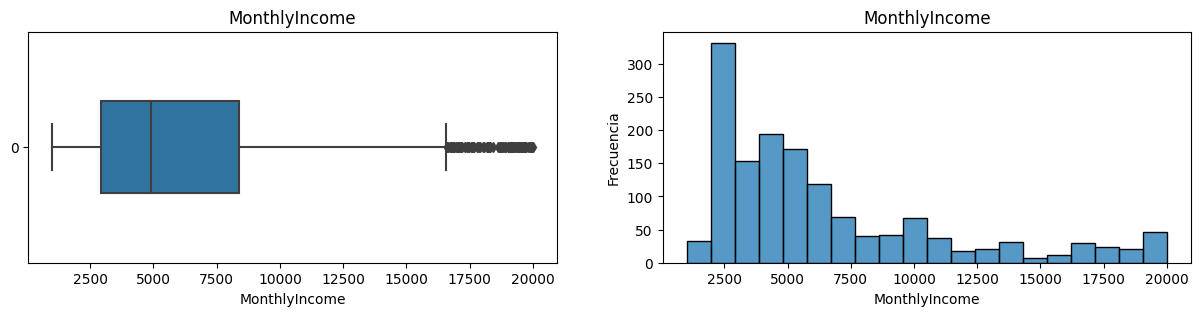

In [71]:
var = "MonthlyIncome"
var_title = "MonthlyIncome"
fig, ax = plt.subplots (1, 2, figsize=(15,3))
sns.boxplot(data=data[var], ax=ax[0], orient="h", width=0.4)
ax[0].set_xlabel(var_title)
ax[0].set_title(var)

sns.histplot(data=data[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel("Frecuencia")
ax[1].set_title(var)

#! Analizamos:
    #* Hay outliers.
    #* Entre 0 y 5000 hay una mayor cantidad de empleados.
    

Text(0.5, 1.0, 'PerformanceRating')

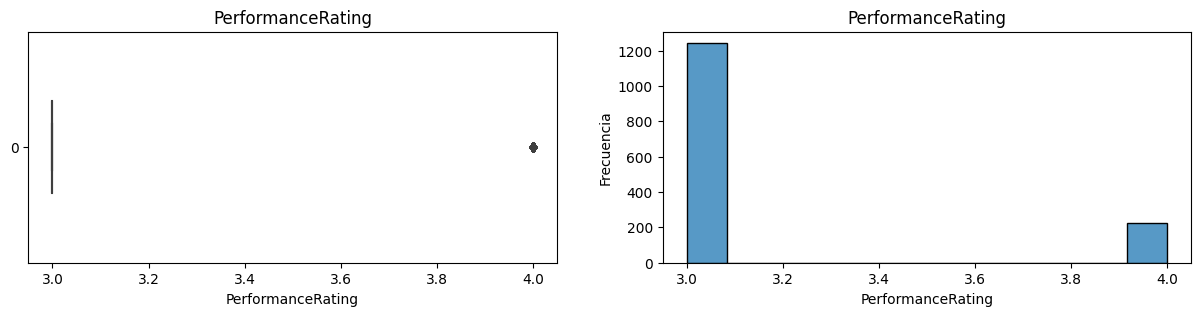

In [73]:
var = "PerformanceRating"
var_title = "PerformanceRating"
fig, ax = plt.subplots (1, 2, figsize=(15,3))
sns.boxplot(data=data[var], ax=ax[0], orient="h", width=0.4)
ax[0].set_xlabel(var_title)
ax[0].set_title(var)

sns.histplot(data=data[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel("Frecuencia")
ax[1].set_title(var)

#! Analizamos:
#* La clase 3 es mayoritaria.

In [ ]:
var = "PercentSalaryHike"
var_title = "PercentSalaryHike"
fig, ax = plt.subplots (1, 2, figsize=(15,3))
sns.boxplot(data=data[var], ax=ax[0], orient="h", width=0.4)
ax[0].set_xlabel(var_title)
ax[0].set_title(var)

sns.histplot(data=data[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel("Frecuencia")
ax[1].set_title(var)

#! Analizamos:

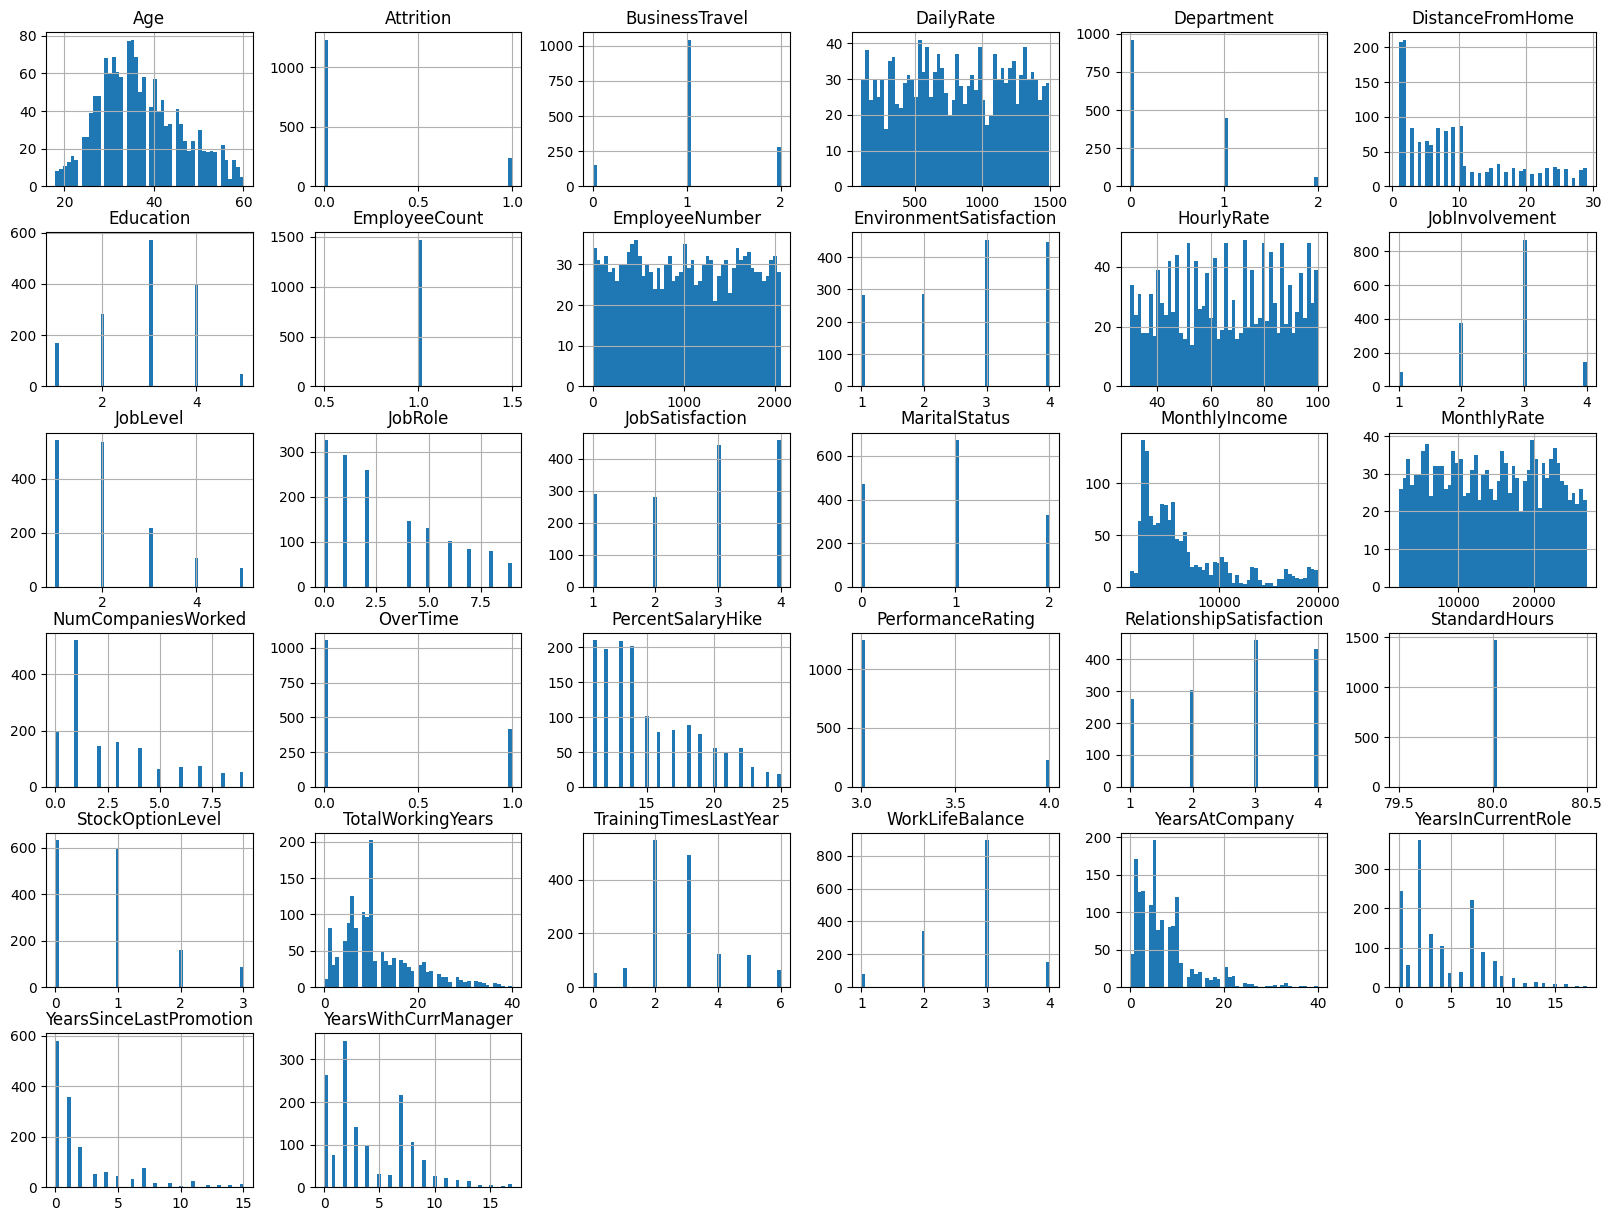

In [27]:
data.hist(bins=50, figsize=(20,15))
plt.show()
#(Histograma no coge las categoricas)
#(No se ve nada raro en los histogramas).

In [ ]:
data.scate(bins=50, figsize=(20,15))
plt.show()

# 3. Análisis Bivariado

## 1 vs Target

<Axes: xlabel='Age', ylabel='Count'>

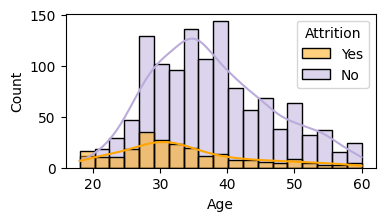

In [63]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.histplot(x='Age', hue='Attrition', data = data, kde=True, palette=custom_palette)

#! Analisis
    #* Vemos que la edad de abandono del trabajo está entre las edades comprendidas entre los 25 y 35.
    #* La edad de abandono del trabajo es mayor en los empleados más jóvenes.
    #* La edad de abandono del trabajo es menor en los empleados más mayores.
    

<Axes: xlabel='Gender', ylabel='count'>

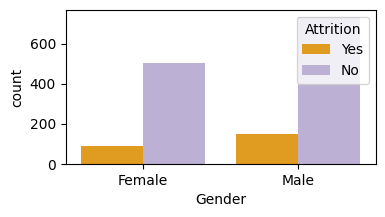

In [64]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='Gender', hue='Attrition', data = data, palette=custom_palette)

#! Analisis
    #* La tasa de abandono del trabajo es mayor en los hombres.

<Axes: xlabel='Education', ylabel='count'>

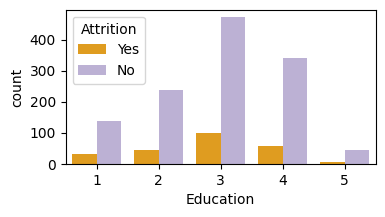

In [95]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='Education', hue='Attrition', data = data, palette=custom_palette)

#! Analisis

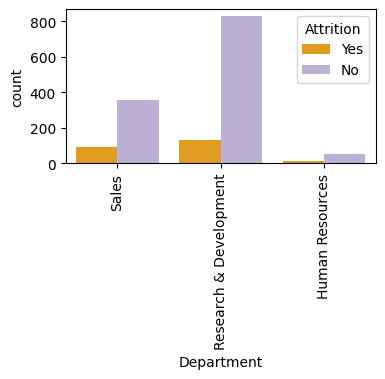

In [83]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='Department', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

#! Analisis

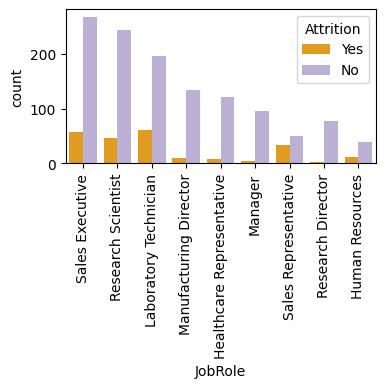

In [65]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='JobRole', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

#! Analisis
    # Vemos que con respecto a los Representantes de ventas, no hay mucha diferencia en su tasa de rotacion.
    # Los puestos de Dirección son los que menos se van de la empresa.
    # Los que mas abandonan, son los Tecnicos, cientificos, y los ejecutivos de ventas.


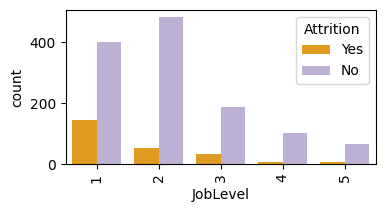

In [84]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='JobLevel', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

#! Analisis
  # Las personas  que más abandonan la empresa son empleados Junior

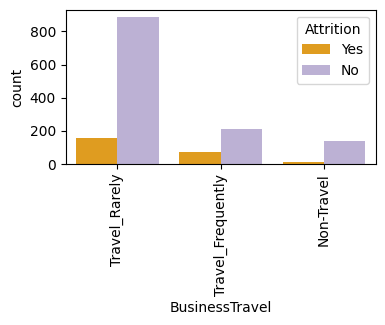

In [85]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='BusinessTravel', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()
#! Analisis
  # Los trabajadores que viajan de vez en cuando tienen la mayor tasa de rotación.

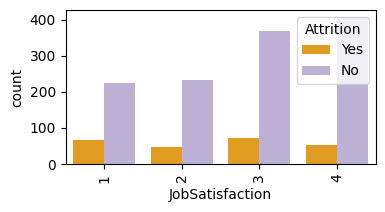

In [67]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='JobSatisfaction', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

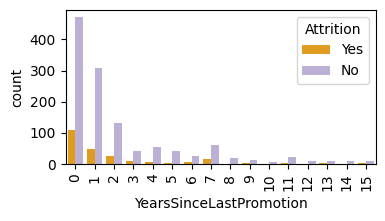

In [68]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()
#! Analisis
  # Los trabajadores que  abandonan su empleo se concentran más si no tienen promoción

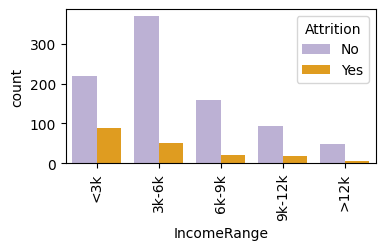

In [6]:
bins = [0, 3000, 6000, 9000, 12000, 15000]
labels = ['<3k', '3k-6k', '6k-9k', '9k-12k', '>12k']
data['IncomeRange'] = pd.cut(data['MonthlyIncome'], bins=bins, labels=labels)

plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='IncomeRange', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()
#! Analisis
  # Losa salarios más bajos, son los que tienen un abandono de empleo mayor.

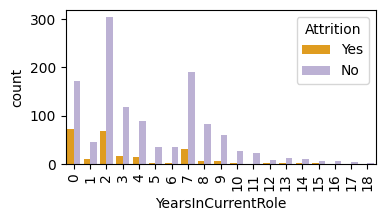

In [76]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

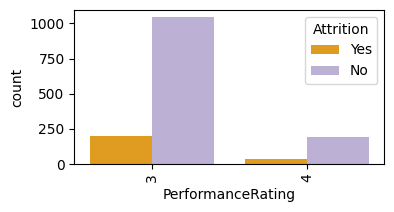

In [77]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='PerformanceRating', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

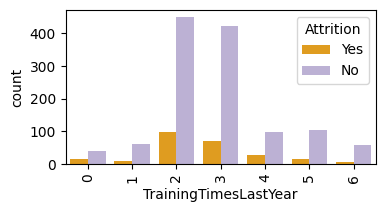

In [78]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='TrainingTimesLastYear', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

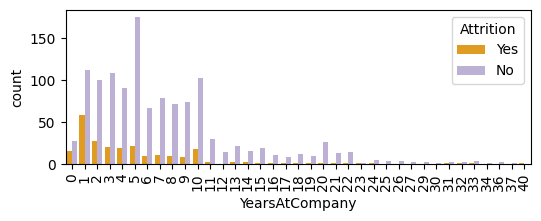

In [80]:
plt.figure(figsize=(6, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='YearsAtCompany', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

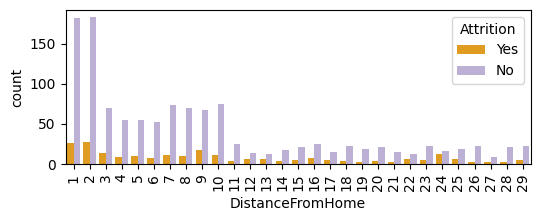

In [82]:
plt.figure(figsize=(6, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='DistanceFromHome', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

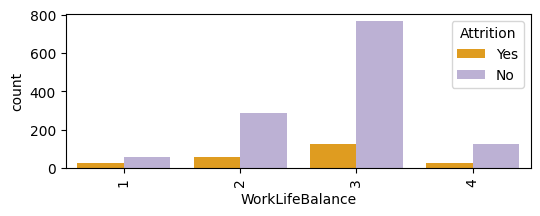

In [81]:
plt.figure(figsize=(6, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='WorkLifeBalance', hue='Attrition', data = data, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()

In [ ]:
table = pd.crosstab(data["JobRole"], data["Attrition"])
table["Average YearsInCurrentRole"] = table.apply(lambda x: data[(data["JobRole"] == x.name) & (data["Attrition"] == "No")]["YearsInCurrentRole"].mean(), axis=1)
table

In [60]:
data['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [ ]:
# custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
# sns.pairplot(data, hue="Attrition")


In [ ]:
# sns.pairplot(data, hue="OverTime")


Analizar estad ́ısticamente el dataset: Separar el an ́alisis de las variables num ́ericas y categ ́oricas.


In [75]:
# Seleccionar las columnas numericas
lista_num = data._get_numeric_data().columns
# Crear DF con las columnas numericas
data_num = data[lista_num]
# Crear DF con las columnas categoricas.
data_cat = data.drop(columns=data_num)

In [76]:
# X=data_cat.drop(columns=['Attrition'])
# y=data_cat['Attrition']

In [77]:
from sklearn.preprocessing import OneHotEncoder
# Identificar las columnas categóricas
categorical_columns = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus', 'OverTime',"Attrition"
]
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(data[categorical_columns])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

In [78]:
data_encoded = pd.concat([data_num, encoded_df], axis = 1)
data_encoded

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_1,Attrition_Yes
0,44,1467,20,3,1,1475,4,49,3,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,34,735,3,1,1,1915,4,75,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,35,776,1,4,1,100,3,32,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,50,562,8,2,1,723,2,50,3,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,26,1349,23,3,1,560,1,90,3,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,42,1332,2,4,1,477,1,98,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1172,41,1018,1,3,1,1349,3,66,3,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1173,43,1082,27,3,1,1126,3,83,3,3,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1174,31,542,20,3,1,175,2,71,1,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [79]:
# Renombrar las columnas
data_encoded = data_encoded.rename(columns={
    'OverTime_Yes': 'OverTime',
    'Attrition_Yes': 'Attrition'
})

 ## 9. Preseleccionar cuales son las variables m ́as importantes del dataset: Las mas relacionadas con el pronostico.
- Attrition_Yes
- OverTime_Yes 
- MaritalStatus_Single
- JobRole_Sales Representative
- BusinessTravel_Travel_Frequently
- JobRole_Laboratory Technician
- Department_Sales
- DistanceFromHome
- EducationField_Technical Degree
- EducationField_Marketing


In [80]:
abs(data_encoded.corr()["Attrition"].sort_values(ascending=False).head(11))

Attrition                           1.000000
Overtime_squared                    0.246854
OverTime                            0.246854
OverTime_1                          0.246854
MaritalStatus_Single                0.187842
JobRole_Sales Representative        0.173131
YearOfJoining                       0.144302
JobRole_Laboratory Technician       0.116447
BusinessTravel_Travel_Frequently    0.106759
DistanceFromHome                    0.084832
Department_Sales                    0.072756
Name: Attrition, dtype: float64

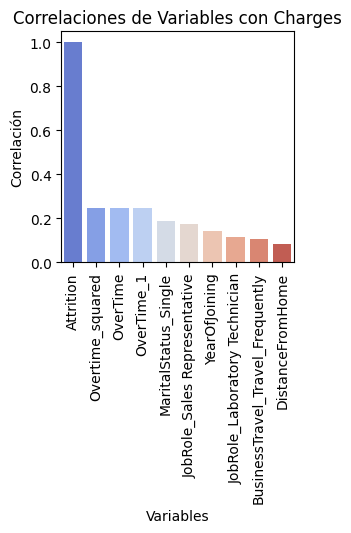

In [81]:
correlation_with_charges = data_encoded.corr()["Attrition"].sort_values(ascending=False).head(10)
plt.figure(figsize=(3, 3))
sns.barplot(x=correlation_with_charges.index, y=correlation_with_charges.values, palette='coolwarm')
plt.title('Correlaciones de Variables con Charges')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.show()

<Axes: >

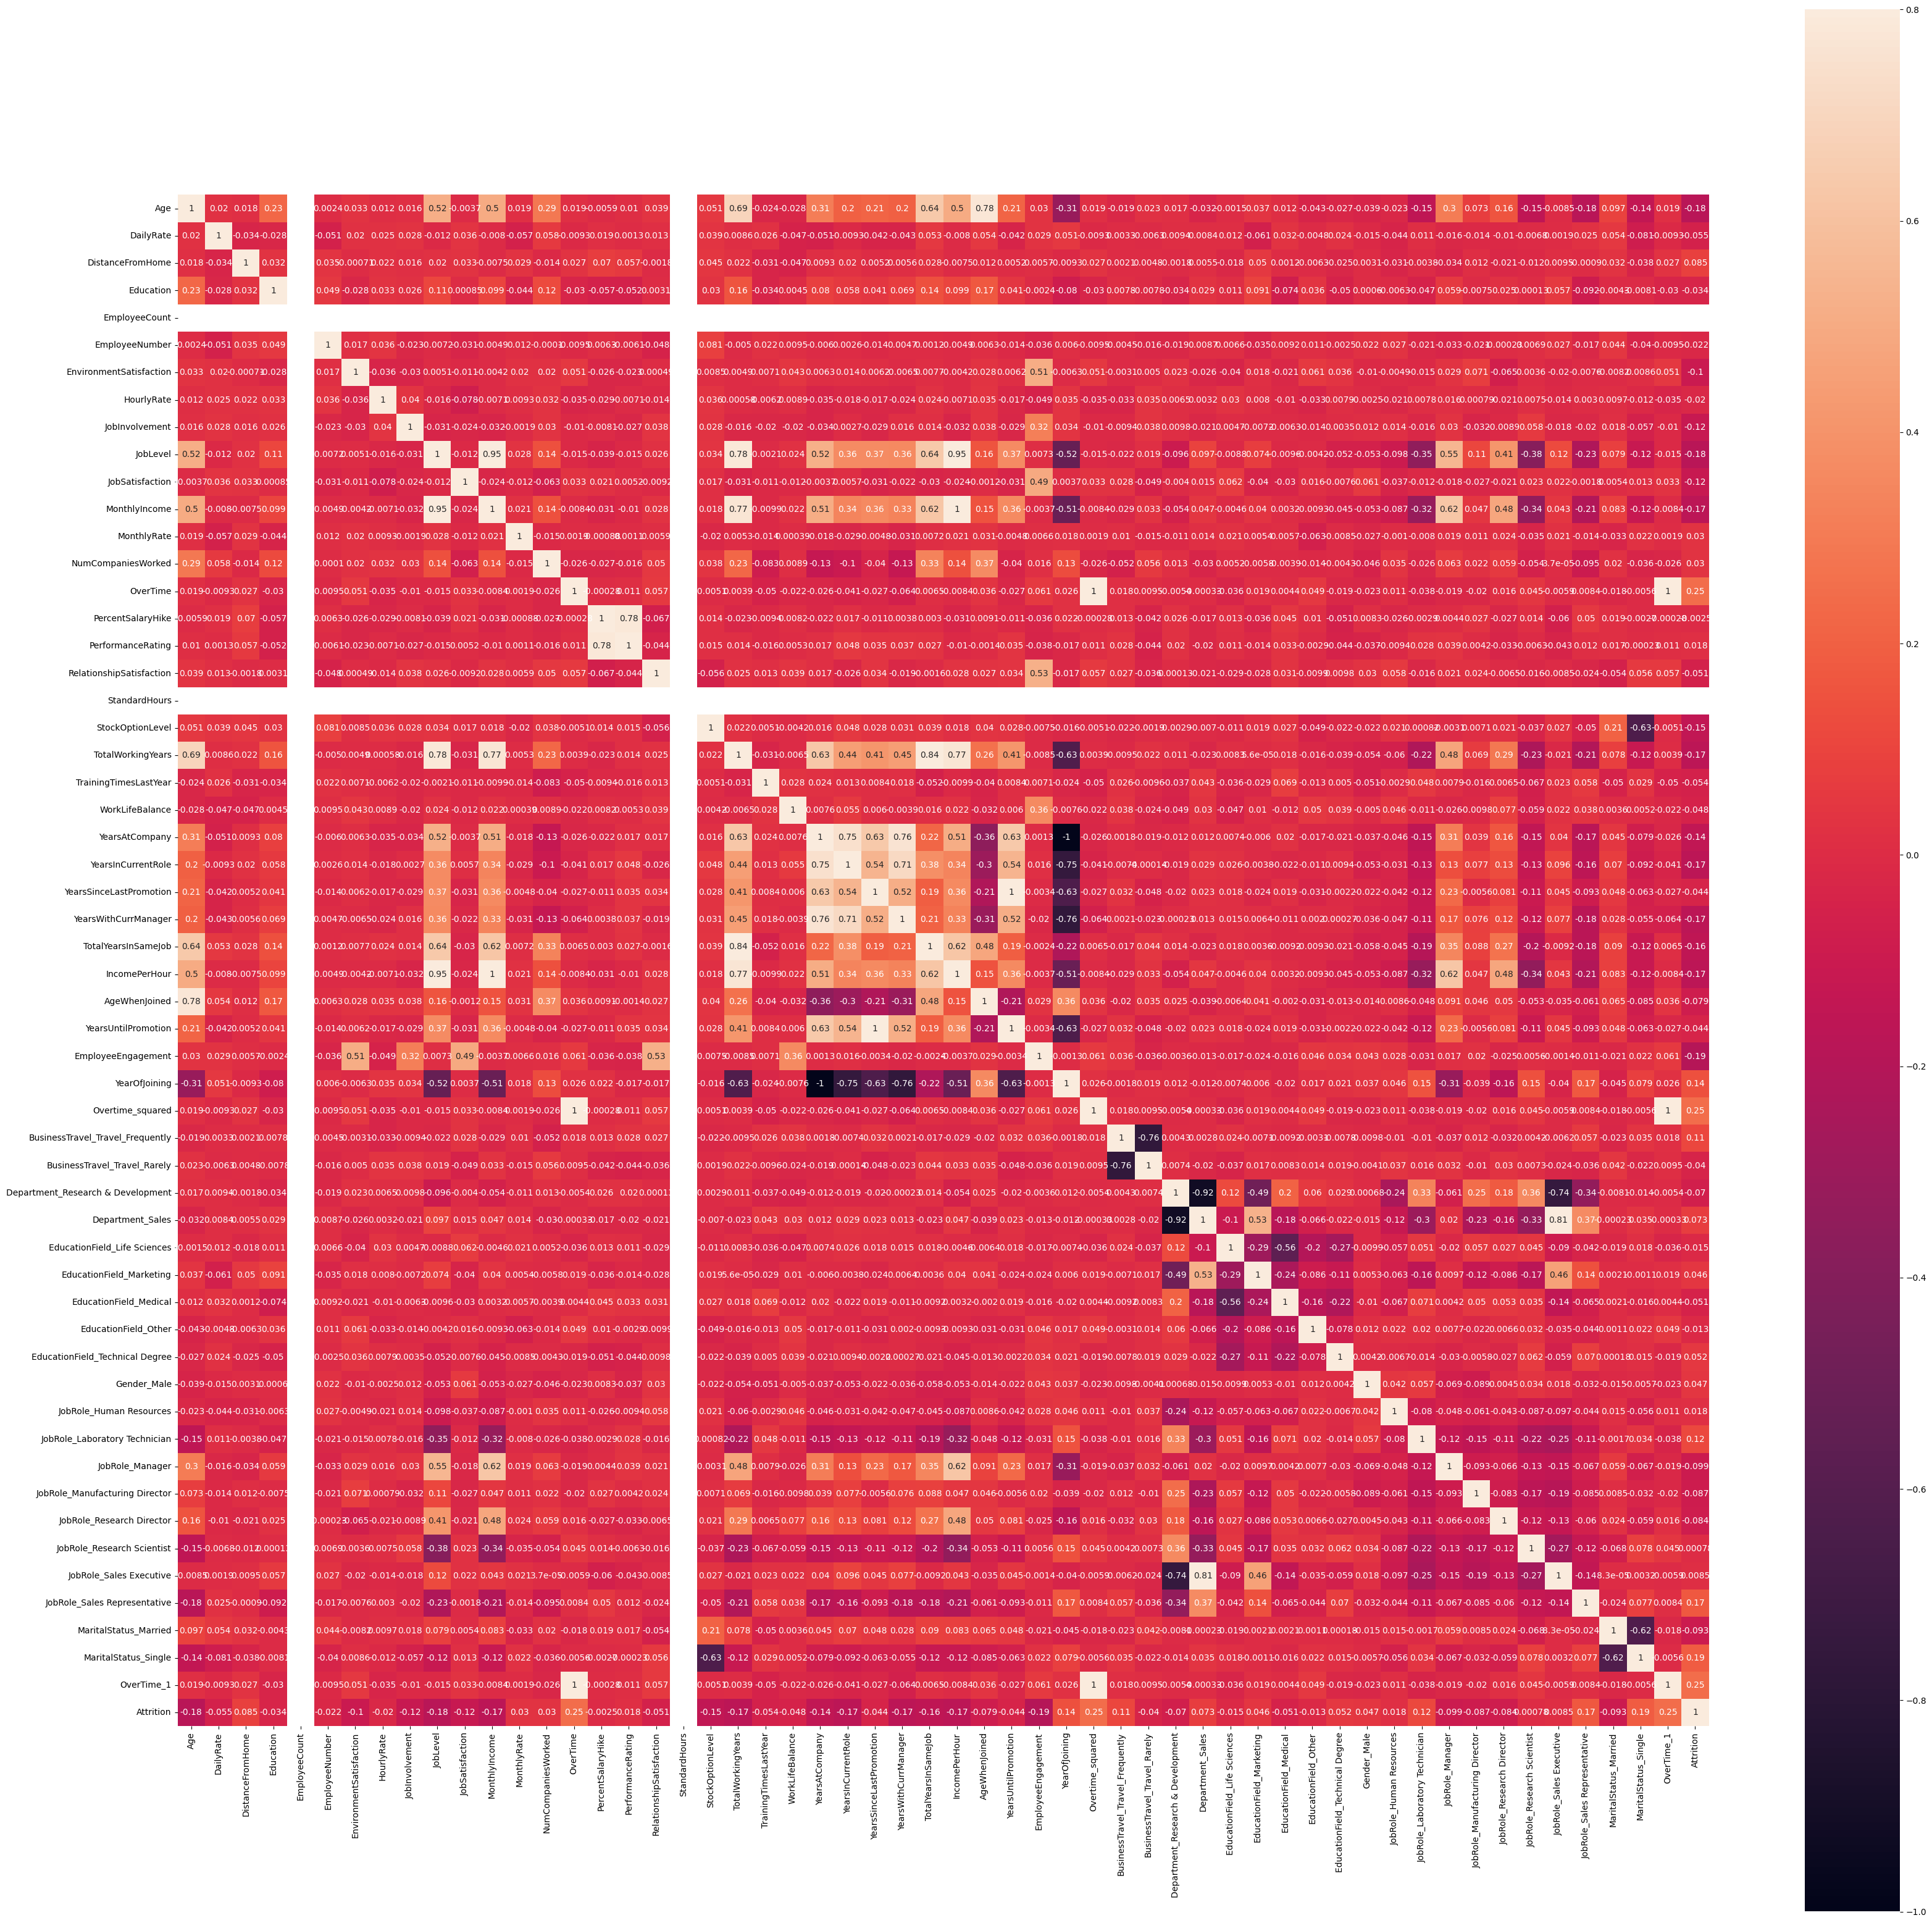

In [82]:
fig, ax = plt.subplots(figsize=(40,40))
x = data_encoded.corr()
sns.heatmap(x, vmax=.8, square=True, annot=True)
#Las mas claritas son las que tienen mas correlacion. # Cuando son binarias, las correlacciones son

### Porcentaje de correlacion con Attrition (para la nueva versión del PPT)

Porcentajes de atributos en la categoría con mayor correlación:
OverTime: 36.9%
MonthlyIncome: 24.9%
StockOptionLevel: 22.3%
DailyRate: 8.2%
MonthlyRate: 4.4%
HourlyRate: 2.9%
PercentSalaryHike: 0.4%


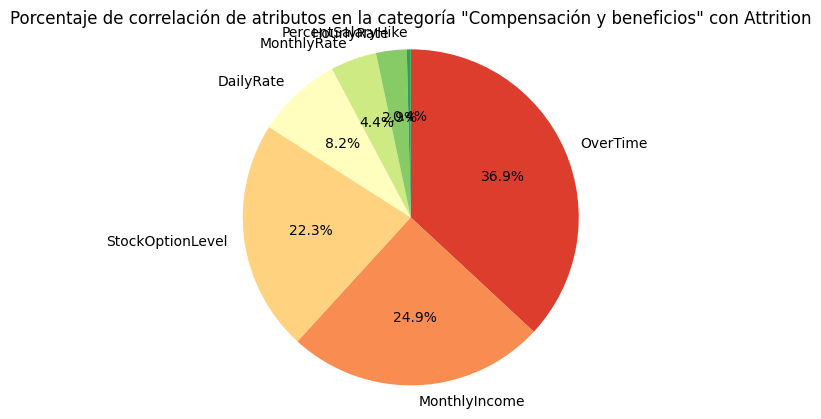

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las categorías de características
categorias = {
    "Demográficas": ["Age", "Education", "EducationField", "Gender", "MaritalStatus"],
    "Relaccionadas con el trabajo": ["JobRole", "Department", "BusinessTravel", "JobLevel", "JobInvolvement", "JobSatisfaction"],
    "Desempeño y Evaluación": ["PerformanceRating", "YearsAtCompany", "YearsInCurrentRole", "YearsWithCurrManager", "NumCompaniesWorked", "TrainingTimesLastYear", "YearsSinceLastPromotion"],
    "Compensación y beneficios": ["MonthlyIncome", "PercentSalaryHike", "StockOptionLevel", "OverTime", "HourlyRate", "DailyRate", "MonthlyRate"],
    "Trabajo-Vida": ["WorkLifeBalance", "DistanceFromHome", "EnvironmentSatisfaction", "RelationshipSatisfaction"],
    "Horario y Empleabilidad": ["TotalWorkingYears", "StandardHours", "Over18", "EmployeeNumber", "EmployeeCount"],
}

# Calcular la correlación de cada categoría con Attrition
correlaciones = {}
for categoria, columnas in categorias.items():
    corr_total = 0
    for columna in columnas:
        if columna in data_encoded.columns:
            corr = abs(data_encoded[[columna, "Attrition"]].corr().iloc[0, 1])
            if pd.isna(corr):
                corr = 0
            corr_total += corr
        else:
            # Manejo para columnas que se expanden en múltiples columnas dummy
            dummy_cols = [col for col in data_encoded.columns if col.startswith(columna + '_')]
            if dummy_cols:
                corr = abs(data_encoded[dummy_cols + ["Attrition"]].corr().iloc[:-1, -1]).mean()
                if pd.isna(corr):
                    corr = 0
                corr_total += corr
    correlaciones[categoria] = corr_total

# Calcular el porcentaje de cada categoría
total_corr = sum(correlaciones.values())
porcentajes = {categoria: (corr / total_corr) * 100 for categoria, corr in correlaciones.items()}

# Encontrar la categoría con el mayor porcentaje
categoria_max = max(porcentajes, key=porcentajes.get)
atributos_max = categorias[categoria_max]

# Calcular la correlación de cada atributo en la categoría con Attrition
correlaciones_atributos = {}
for columna in atributos_max:
    if columna in data_encoded.columns:
        corr = abs(data_encoded[[columna, "Attrition"]].corr().iloc[0, 1])
        if pd.isna(corr):
            corr = 0
        correlaciones_atributos[columna] = corr
    else:
        # Manejo para columnas que se expanden en múltiples columnas dummy
        dummy_cols = [col for col in data_encoded.columns if col.startswith(columna + '_')]
        if dummy_cols:
            corr = abs(data_encoded[dummy_cols + ["Attrition"]].corr().iloc[:-1, -1]).mean()
            if pd.isna(corr):
                corr = 0
            correlaciones_atributos[columna] = corr

# Calcular el porcentaje de cada atributo en la categoría
total_corr_atributos = sum(correlaciones_atributos.values())
porcentajes_atributos = {atributo: (corr / total_corr_atributos) * 100 for atributo, corr in correlaciones_atributos.items()}

# Ordenar los atributos por porcentaje de correlación de mayor a menor
porcentajes_atributos = dict(sorted(porcentajes_atributos.items(), key=lambda item: item[1], reverse=True))

# Imprimir los porcentajes de atributos con un decimal
print("Porcentajes de atributos en la categoría con mayor correlación:")
for atributo, porcentaje in porcentajes_atributos.items():
    print(f"{atributo}: {porcentaje:.1f}%")

# Crear una paleta de colores de verde a rojo
num_colors = len(porcentajes_atributos)
colors = sns.color_palette("RdYlGn_r", num_colors)  # Paleta de colores de rojo a verde

# Asegurar que el rojo sea el mayor porcentaje y el verde el menor
# Invertir la lista de colores para que el rojo sea el color más alto
colors = colors[::-1]

# Crear el gráfico circular
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(porcentajes_atributos.values(), labels=porcentajes_atributos.keys(), autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors)
ax.axis('equal')  # Para que el gráfico sea un círculo perfecto

# Mejorar la legibilidad del gráfico
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')

plt.title(f'Porcentaje de correlación de atributos en la categoría "{categoria_max}" con Attrition')
plt.show()



### Mostar ahora grafico con los atributos de la categoria con mayor porcentaje  (para la nueva versión del PPT)

Porcentajes de atributos en la categoría con mayor correlación:
OverTime: 36.9%
MonthlyIncome: 24.9%
StockOptionLevel: 22.3%
DailyRate: 8.2%
MonthlyRate: 4.4%
HourlyRate: 2.9%
PercentSalaryHike: 0.4%


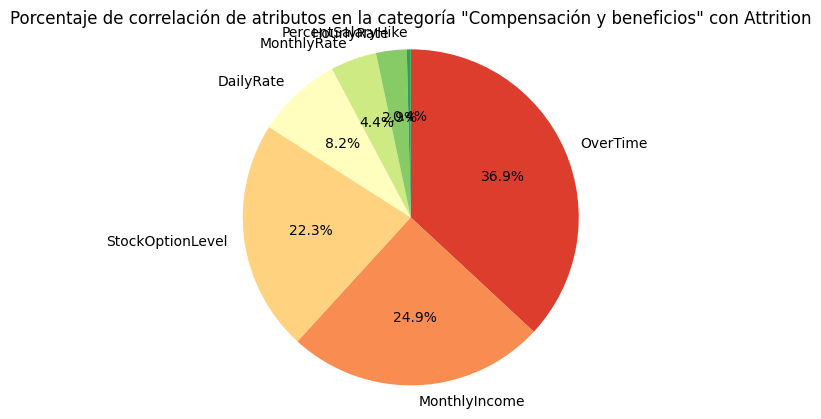

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las categorías de características
categorias = {
    "Demográficas": ["Age", "Education", "EducationField", "Gender", "MaritalStatus"],
    "Relaccionadas con el trabajo": ["JobRole", "Department", "BusinessTravel", "JobLevel", "JobInvolvement", "JobSatisfaction"],
    "Desempeño y Evaluación": ["PerformanceRating", "YearsAtCompany", "YearsInCurrentRole", "YearsWithCurrManager", "NumCompaniesWorked", "TrainingTimesLastYear", "YearsSinceLastPromotion"],
    "Compensación y beneficios": ["MonthlyIncome", "PercentSalaryHike", "StockOptionLevel", "OverTime", "HourlyRate", "DailyRate", "MonthlyRate"],
    "Trabajo-Vida": ["WorkLifeBalance", "DistanceFromHome", "EnvironmentSatisfaction", "RelationshipSatisfaction"],
    "Horario y Empleabilidad": ["TotalWorkingYears", "StandardHours", "Over18", "EmployeeNumber", "EmployeeCount"],
}

# Calcular la correlación de cada categoría con Attrition
correlaciones = {}
for categoria, columnas in categorias.items():
    corr_total = 0
    for columna in columnas:
        if columna in data_encoded.columns:
            corr = abs(data_encoded[[columna, "Attrition"]].corr().iloc[0, 1])
            if pd.isna(corr):
                corr = 0
            corr_total += corr
        else:
            # Manejo para columnas que se expanden en múltiples columnas dummy
            dummy_cols = [col for col in data_encoded.columns if col.startswith(columna + '_')]
            if dummy_cols:
                corr = abs(data_encoded[dummy_cols + ["Attrition"]].corr().iloc[:-1, -1]).mean()
                if pd.isna(corr):
                    corr = 0
                corr_total += corr
    correlaciones[categoria] = corr_total

# Calcular el porcentaje de cada categoría
total_corr = sum(correlaciones.values())
porcentajes = {categoria: (corr / total_corr) * 100 for categoria, corr in correlaciones.items()}

# Encontrar la categoría con el mayor porcentaje
categoria_max = max(porcentajes, key=porcentajes.get)
atributos_max = categorias[categoria_max]

# Calcular la correlación de cada atributo en la categoría con Attrition
correlaciones_atributos = {}
for columna in atributos_max:
    if columna in data_encoded.columns:
        corr = abs(data_encoded[[columna, "Attrition"]].corr().iloc[0, 1])
        if pd.isna(corr):
            corr = 0
        correlaciones_atributos[columna] = corr
    else:
        # Manejo para columnas que se expanden en múltiples columnas dummy
        dummy_cols = [col for col in data_encoded.columns if col.startswith(columna + '_')]
        if dummy_cols:
            corr = abs(data_encoded[dummy_cols + ["Attrition"]].corr().iloc[:-1, -1]).mean()
            if pd.isna(corr):
                corr = 0
            correlaciones_atributos[columna] = corr

# Calcular el porcentaje de cada atributo en la categoría
total_corr_atributos = sum(correlaciones_atributos.values())
porcentajes_atributos = {atributo: (corr / total_corr_atributos) * 100 for atributo, corr in correlaciones_atributos.items()}

# Ordenar los atributos por porcentaje de correlación de mayor a menor
porcentajes_atributos = dict(sorted(porcentajes_atributos.items(), key=lambda item: item[1], reverse=True))

# Imprimir los porcentajes de atributos con un decimal
print("Porcentajes de atributos en la categoría con mayor correlación:")
for atributo, porcentaje in porcentajes_atributos.items():
    print(f"{atributo}: {porcentaje:.1f}%")

# Crear una paleta de colores de verde a rojo
num_colors = len(porcentajes_atributos)
colors = sns.color_palette("RdYlGn_r", num_colors)  # Paleta de colores de rojo a verde

# Asegurar que el rojo sea el mayor porcentaje y el verde el menor
# Invertir la lista de colores para que el rojo sea el color más alto
colors = colors[::-1]

# Crear el gráfico circular
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(porcentajes_atributos.values(), labels=porcentajes_atributos.keys(), autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors)
ax.axis('equal')  # Para que el gráfico sea un círculo perfecto

# Mejorar la legibilidad del gráfico
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')

plt.title(f'Porcentaje de correlación de atributos en la categoría "{categoria_max}" con Attrition')
plt.show()